# 2) Brand Positioning by Price Segment

This section analyzes how major smartphone brands are distributed across key price segments (₹20–30k, ₹30–40k, ₹40–60k, ₹60k+).  
The goal is to identify which brands dominate certain tiers and to highlight differences in market strategy, such as midrange volume play versus flagship specialization.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df.dropna(subset=["price"])

# Define price bands
bins = [20000, 30000, 40000, 60000, np.inf]
labels = ["₹20–30k", "₹30–40k", "₹40–60k", "₹60k+"]
df["price_segment"] = pd.cut(df["price"], bins=bins, labels=labels, right=False, include_lowest=True)

df.head(3)

,name,price,specs,ram_gb,storage_gb,display_inch,battery_mah,camera_mp,brand,price_segment
0,REDMI Note 13 Pro 5G,20000.0,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",8.0,128.0,6.67,5100.0,200,Xiaomi,₹20–30k
1,Samsung Galaxy A13,20000.0,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,6.0,128.0,6.60,5000.0,50,Samsung,₹20–30k
2,POCO F1,20000.0,"['6 GB RAM | 128 GB ROM', '15.7 cm (6.18 inch)...",6.0,128.0,6.18,4000.0,12,OnePlus,₹20–30k


In [1]:
brand_palette = {
    "Samsung": "#1f77b4",   # soft blue
    "OnePlus": "#d62728",   # muted red
    "Google Pixel": "#2ca02c",  # medium green
    "Realme": "#ffbb00",    # yellow-gold
    "Vivo": "#9467bd",      # purple
    "Xiaomi": "#ff7f0e",    # orange
    "Oppo": "#8c564b"       # taupe brown
}

---
## Brand Distribution by Price Segment

This table summarizes the number of models per brand in each price segment. It helps identify which brands focus heavily on midrange tiers versus premium or flagship segments.

In [11]:
# Cross-tab: rows = price segment, columns = brands
brand_segment_ct = pd.crosstab(df["price_segment"], df["brand"])

brand_segment_ct["Total"] = brand_segment_ct.sum(axis=1)
brand_segment_ct.loc["Total"] = brand_segment_ct.sum(axis=0)

brand_segment_ct

brand,OnePlus,Oppo,Pixel,Realme,Samsung,Vivo,Xiaomi,Total
price_segment,,,,,,,,
₹20–30k,35,47,41,62,78,63,60,386
₹30–40k,17,14,9,8,14,26,6,94
₹40–60k,10,7,9,3,7,9,4,49
₹60k+,13,3,12,0,16,2,2,48
Total,75,71,71,73,115,100,72,577


---
## Brand Composition within Each Price Segment

This stacked bar chart shows the share of brands in each price range. It visualizes how brands distribute their offerings across price tiers and reveals whether a brand plays across all segments or focuses on a specific one.

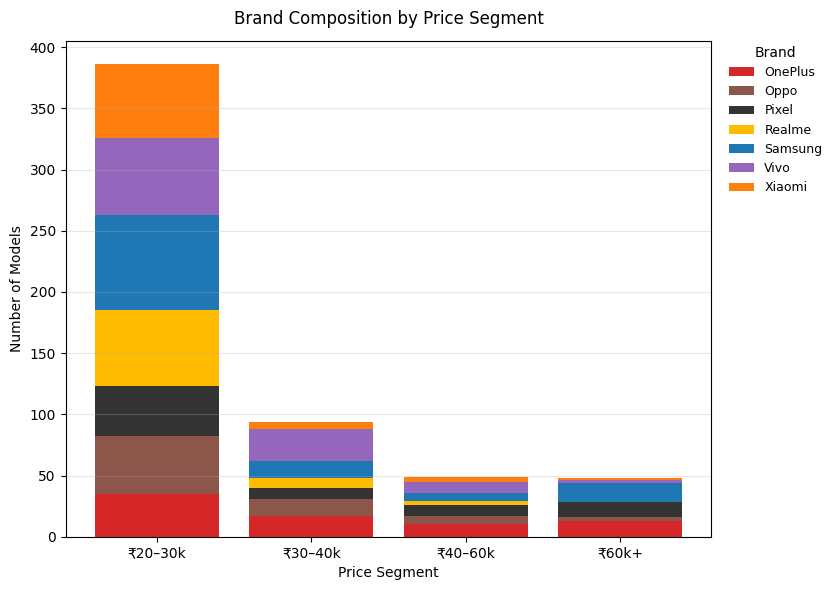

Saved: analysis/figures\brand_composition_by_segment.png


In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_data = brand_segment_ct.drop("Total", axis=0, errors="ignore").drop("Total", axis=1, errors="ignore")

bottom = np.zeros(len(plot_data))
for brand in plot_data.columns:
    color = brand_palette.get(brand, "#333333")
    ax.bar(
        plot_data.index.astype(str),
        plot_data[brand],
        bottom=bottom,
        label=brand,
        color=color
    )
    bottom += plot_data[brand].values

ax.set_title("Brand Composition by Price Segment", pad=12)
ax.set_xlabel("Price Segment")
ax.set_ylabel("Number of Models")
ax.grid(axis="y", alpha=0.3)
ax.legend(
    title="Brand",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=9
)
plt.tight_layout(rect=[0, 0, 0.85, 1])
fig_path_counts = os.path.join(FIG_DIR, "brand_composition_by_segment.png")
plt.savefig(fig_path_counts, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_counts}")

---
## Relative Market Share by Price Segment

This normalized chart highlights brand dominance within each price segment.  
It expresses each brand’s share as a percentage of all models available in that range.

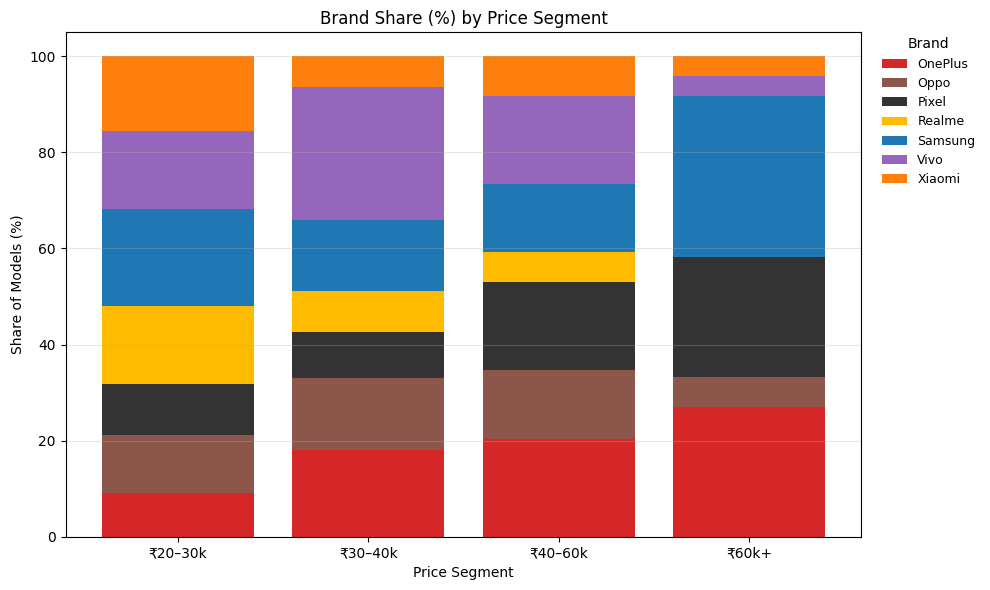

Saved: analysis/figures\brand_share_by_segment.png


In [14]:
share_ct = brand_segment_ct.drop("Total", axis=0, errors="ignore")
if "Total" in share_ct.columns:
    share_ct = share_ct.drop("Total", axis=1)

# Convert to percentages
share_ct = share_ct.div(share_ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(share_ct))
for brand in share_ct.columns:
    color = brand_palette.get(brand, "#333333")
    ax.bar(share_ct.index.astype(str), share_ct[brand], bottom=bottom, label=brand, color=color)
    bottom += share_ct[brand].values

ax.set_title("Brand Share (%) by Price Segment")
ax.set_xlabel("Price Segment")
ax.set_ylabel("Share of Models (%)")
ax.legend(
    title="Brand",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=9
)
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()

fig_path_share = os.path.join(FIG_DIR, "brand_share_by_segment.png")
plt.savefig(fig_path_share, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_share}")

---
# Summary & Insights — Brand Positioning by Price Segment

### Overview
This analysis explores how seven major smartphone brands distribute their 5G models across key price segments (₹20–30k, ₹30–40k, ₹40–60k, and ₹60k+).  
The objective was to understand each brand’s market positioning — whether they pursue broad multi-tier coverage or concentrate within specific price bands.

### Key Observations
- The market remains **heavily anchored in the ₹20–30k segment**, accounting for **67%** of all listed models.  
  Every brand, except Google Pixel, has a strong presence here, confirming that the lower-premium tier drives volume.
- **Samsung** dominates in absolute presence, spanning **all four price tiers** with **115 models**.  
  Its product range extends from Galaxy M-series to the S and Fold flagships, signaling a “full-spectrum” strategy.
- **Realme**, **Vivo**, and **Xiaomi** operate primarily within the **₹20–30k** range, competing aggressively in the entry-premium category.  
  These brands appear to prioritize volume and competitive pricing over high-end specialization.
- **OnePlus** displays a clear concentration in the **₹40–60k** band, positioning itself as a *performance-premium* brand rather than a budget player.
- **Google Pixel** contributes heavily to the **₹60k+** and **₹20–30k** segments only, highlighting a **dual-market strategy** — one focused on flagships and another on compact “value flagships” like the Pixel 7a series.
- **Oppo** and **Vivo** exhibit very similar spread patterns, confirming their shared market positioning: aggressive midrange play with selective premium entries.

### Interpretations
- The **₹20–30k price tier** acts as the central battlefield, with six out of seven brands intensely competing for visibility and volume.  
  This reflects India’s strong *value-for-money* consumer base.
- The **₹30–40k** and **₹40–60k** segments are thinner, primarily occupied by OnePlus and Samsung’s A-series — a transition zone between midrange affordability and flagship performance.
- The **flagship zone (₹60k+)** is narrowly dominated by **Samsung and Google**, confirming that high-end market presence remains limited to established brand reputations.
- The diversity of brand strategies indicates a **bifurcated market** — broad multi-segment brands versus specialized premium contenders.

### Implications
- **For Consumers:** Mid-premium buyers benefit from unparalleled brand variety and competitive specs; however, choices above ₹60k are limited to a handful of premium lines.
- **For Brands:** Long-term growth depends on mastering the ₹20–40k space, where competition is fiercest but loyalty can be built through perceived value and reliability.
- **For Analysts:** This brand–price segmentation serves as a crucial foundation for further study into **spec–price correlations** and **value differentiation**, which will be explored in the next notebook.

---